<a href="https://colab.research.google.com/github/PKpacheco/dl_assignment_1/blob/main/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Assignment 1: Concrete Strength Regression

In [50]:
# import libraries
import pandas as pd

**1. Data**

a. Load *Concrete_Data_Yeh.csv* into a pandas dataframe. Print out the header. Use *pandas.DataFrame.describe* to summarize the data. Using markdown, explain the meaning of each column and make observations about the dataset.

In [51]:
# load the data
# df = pd.read_csv("/content/drive/MyDrive/COMP3704_NN/Assignment 1/Concrete_Data_Yeh.csv")

# csv uploaded to github
df = pd.read_csv("https://raw.githubusercontent.com/PKpacheco/dl_assignment_1/main/Concrete_Data_Yeh.csv")



In [52]:
# print the header
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


b. Use *pandas.DataFrame.info* to check if the entries are the correct datatype, and if there are any missing values. Use *pandas.DataFrame.duplicates* to check for duplicate entries. Fix the dataset so that there are no missing values, duplicate rows, or incorrect data types. Use markdown to make observations and explain what you have done.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [54]:
# Check for duplicate rows
duplicateRows = df[df.duplicated()]
print(duplicateRows)



     cement   slag  flyash  water  superplasticizer  coarseaggregate  \
77    425.0  106.3     0.0  153.5              16.5            852.1   
80    425.0  106.3     0.0  153.5              16.5            852.1   
86    362.6  189.0     0.0  164.9              11.6            944.7   
88    362.6  189.0     0.0  164.9              11.6            944.7   
91    362.6  189.0     0.0  164.9              11.6            944.7   
100   425.0  106.3     0.0  153.5              16.5            852.1   
103   425.0  106.3     0.0  153.5              16.5            852.1   
109   362.6  189.0     0.0  164.9              11.6            944.7   
111   362.6  189.0     0.0  164.9              11.6            944.7   
123   425.0  106.3     0.0  153.5              16.5            852.1   
126   425.0  106.3     0.0  153.5              16.5            852.1   
132   362.6  189.0     0.0  164.9              11.6            944.7   
134   362.6  189.0     0.0  164.9              11.6            9

In [55]:
# check for NaN values
nan_df = df.isna()
print()
print("Nan", nan_df)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)


Nan       cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0      False  False   False  False             False            False   
1      False  False   False  False             False            False   
2      False  False   False  False             False            False   
3      False  False   False  False             False            False   
4      False  False   False  False             False            False   
...      ...    ...     ...    ...               ...              ...   
1025   False  False   False  False             False            False   
1026   False  False   False  False             False            False   
1027   False  False   False  False             False            False   
1028   False  False   False  False             False            False   
1029   False  False   False  False             False            False   

      fineaggregate    age  csMPa  
0             False  False  False  
1             False  False  False  
2         

c. Use *seaborn.heatmap* to display the correlation matrix of the features. Use *seaborn.pairplot* to generate scatter plots and histograms. Use markdown to make observations and comment on which features are most correlated with compressive strength.

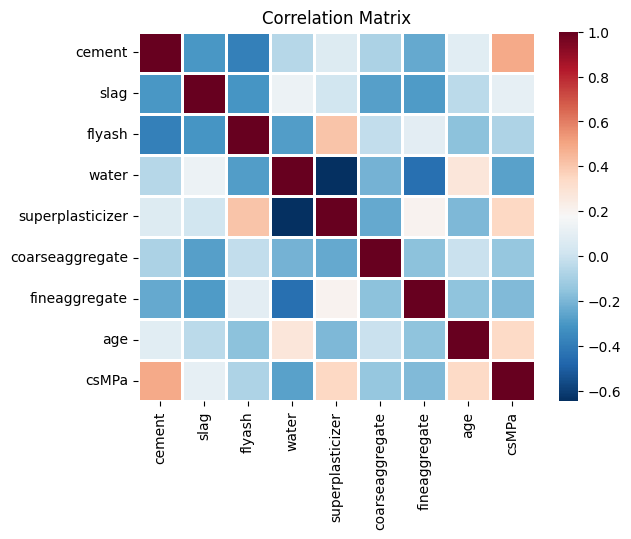

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# associate correlation dataframe to a variable
correlation_matrix = df.corr()

# generate the heatmat using seaborn, change the color to coolwarm presset colors and add line to separate
sns.heatmap(correlation_matrix,  cmap='RdBu_r', linewidths=1) # positive correlations are red and negative are blue, cool tones.
# Create a title to correlation map
plt.title('Correlation Matrix')
# plot the heatmat
plt.show()

In [57]:
# # Generate scatter plots and histograms
# sns.pairplot(df)
# plt.show()

KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x7e937eed1630> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7e937eed08b0> (for post_execute):


KeyboardInterrupt: ignored

d. Move the labels to a separate dataframe. Use *sklearn.preprocessing.MinMaxScaler* to scale the features (but not the labels). Split the data so that 10% is used for testing and 90% for training.

In [58]:
# imports
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# put labels in a separated df (Concrete compressive strength is the label)
labels = df['csMPa']
features = df.drop('csMPa', axis=1)

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(scaled_features, labels, test_size=0.1, random_state=80)


**2. Modeling** (Hint: refer to Exercise 2.02 for help with these steps but note that here we are doing regression while the exercise is on classification, so there are some significant differences.)

a. For both the train and test datasets, save the csMPA column (the label *y*) as a 2d tensorflow variable and the other columns (the features *x*) as a separate 2d tensorflow variable.

In [70]:
import tensorflow as tf

# training
X_train_tf = tf.Variable(X_train, dtype=tf.float32)
y_train_tf = tf.Variable(y_train.values.reshape(-1, 1), dtype=tf.float32)  # Reshape to a 2D tensor

#test
X_test_tf = tf.Variable(X_test, dtype=tf.float32)
y_test_tf = tf.Variable(y_test.values.reshape(-1, 1), dtype=tf.float32)  # Reshape to a 2D tensor


b. Use *tf.zeros* to create tensorflow variables of the appropriate shape for the weights (*w*) and bias (*b*).

In [71]:
input_b_w = X_train_tf.shape[1]

w = tf.Variable(tf.zeros((input_b_w, 1), dtype=tf.float32), name='weights')
b = tf.Variable(tf.zeros(1, dtype=tf.float32), name='bias')


c. Write a regression function to implement the equation *z = xw + b*
 and return the value *z*. (This is similar to the *perceptron* function in Exercise 2.02, but without the extra step of using *tf.sigmoid*. Note that multilinear regression is similar to a perceptron but does not use an activation function.)

In [72]:
def regression(x):
    z = tf.matmul(x, w) + b
    return z


d. Write a loss function as a *lambda* function.

In [73]:
#  MSE FUNCTION
# loss = tf.reduce_mean(tf.square(prediction - y))

def loss(x, y):
    loss = lambda:abs(y- regression(x))
    return loss

e. Write a train function that uses *tf.optimizer.SGD* to minimize the loss with respect to *w* and *b*. Choose an appropriate learning rate. Train a model for at least 1000 epochs on training data.

In [74]:
# SGD
learning_rate = 0.01
# Number of training epochs
total_epochs = 1000

optimizer = tf.optimizers.SGD(learning_rate)


In [75]:
# Define the train function
def train(total_epochs, x, y):
    for _ in range(total_epochs):
      optimizer.minimize(loss(x, y), [w, b])

# Train using training data
train(total_epochs, X_train_tf, y_train_tf)

# Print the trained weights and bias
tf.print("Trained weight:", w)
tf.print("Trained bias:", b)

Trained weight: [[52.5801773]
 [34.2151642]
 [16.494051]
 ...
 [2.66804147]
 [6.4825139]
 [52.2613]]
Trained bias: [1.23998821]


f. Print out the trained weights and bias. Use the regression function you wrote to predict the strength for each row of test data. Write a function to find the root-mean-squared-error of the predictions and use it to print out the RMSE of the model.

In [85]:
from sklearn.metrics import mean_squared_error
# Step 1: Print the trained weights and bias
print("Trained Weights (w):")
print(w.numpy())
print("\nTrained Bias (b):")
print(b.numpy())


Trained Weights (w):
[[ 52.580177 ]
 [ 34.215164 ]
 [ 16.494051 ]
 [-21.009901 ]
 [  6.885329 ]
 [  2.6680415]
 [  6.482514 ]
 [ 52.2613   ]]

Trained Bias (b):
[1.2399882]


In [89]:
predictions = regression(X_test_tf)


def calculate_rmse(predictions, labels):
    mse = tf.reduce_mean(tf.square(predictions - labels))
    rmse = tf.sqrt(mse)
    return rmse

rmse = calculate_rmse(predictions, y_test_tf)
print("\nRoot Mean Squared Error (RMSE):")
print(rmse.numpy())



Root Mean Squared Error (RMSE):
9.723542


In [88]:
# calculate the rmse diff way
rmse_2 = mean_squared_error(y_test_tf, predictions, squared=False)
print(rmse_2)


9.723542


**3. Conclusion**

a. Use your model to make predictions on the test data.

In [17]:
def predict(x):
    return tf.matmul(x, w) + b

predictions = predict(X_test_tf)


In [18]:
tf.print("Predictions:", predictions)


Predictions: [[29.2831039]
 [23.8561783]
 [25.6486702]
 ...
 [44.7915955]
 [38.4631424]
 [41.0959778]]


b. Write code to calculate the percentage of deviations that are bigger than the RMSE.

In [90]:
deviations = tf.abs(predictions - y_test_tf)
larger_than_rmse = tf.math.greater(deviations, rmse)


percentage_more_rmse = tf.reduce_mean(tf.cast(deviations > rmse, tf.float32)) * 100

tf.print("RMSE:", rmse)
tf.print("Percentage of deviations bigger  RMSE:", percentage_more_rmse)


RMSE: 9.72354221
Percentage of deviations bigger  RMSE: 27.7227726


c. Use markdown to comment on how well the model works to make predictions. What uncertainty would you provide to the structural engineers to go along with the strength predictions of the model?